In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("insurance1.csv")

In [7]:
df.head()

,age,affordibility,insurance
0,21,1,0
1,25,1,0
2,31,0,0
3,50,1,1
4,41,1,1


In [8]:
df = df.drop(['affordibility'],axis=1)

In [9]:
df.head()

,age,insurance
0,21,0
1,25,0
2,31,0
3,50,1
4,41,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        34 non-null     int64
 1   insurance  34 non-null     int64
dtypes: int64(2)
memory usage: 676.0 bytes


In [11]:
df.isnull().sum()

age          0
insurance    0
dtype: int64

In [12]:
import matplotlib.pyplot as plt

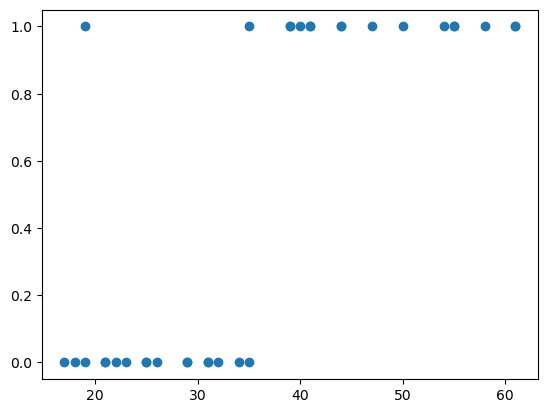

In [13]:
plt.scatter(df['age'], df['insurance'])
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(df[['age']], df['insurance'])

LogisticRegression()

In [19]:
model.coef_

array([[0.27996302]])

In [20]:
model.intercept_

array([-9.67687081])

In [21]:
model.score(df[['age']], df['insurance'])

0.9411764705882353

In [22]:
predict = model.predict(df[['age']])
predict

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
df.age[:5]

0    21
1    25
2    31
3    50
4    41
Name: age, dtype: int64

In [24]:
df.insurance[5:15]

5     0
6     1
7     1
8     1
9     0
10    0
11    1
12    1
13    1
14    1
Name: insurance, dtype: int64

In [25]:
predict[5:15]

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [26]:
model.predict([[53]])

array([1], dtype=int64)

In [27]:
model.predict([[101]])

array([1], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = df[['age']]

In [30]:
y = df.insurance

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [32]:
X_train.shape

(27, 1)

In [33]:
X_test.shape

(7, 1)

In [34]:
y_train.shape

(27,)

In [35]:
y_test.shape

(7,)

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
model.score(X_test, y_test)

0.8571428571428571

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [39]:
y_test

15    0
19    1
27    1
26    0
8     1
24    0
21    1
Name: insurance, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[3, 0],
       [1, 3]], dtype=int64)

In [42]:
import seaborn as sns

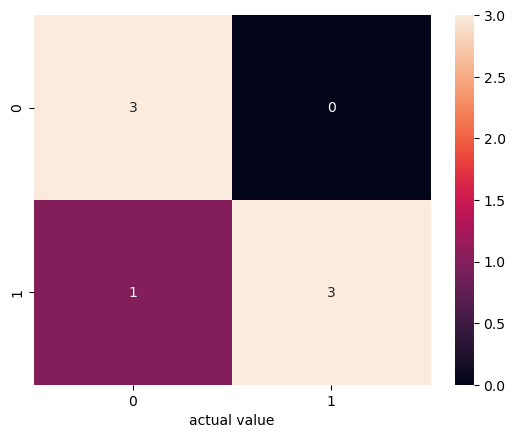

In [43]:
sns.heatmap(cm, annot=True)
plt.xlabel("actual value")
plt.show()